# Dataset [Brain Tumor](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri) 🧠


`URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri`







---
### Abstract ⚛
A Brain tumor is considered as one of the aggressive diseases, among children and adults. Brain tumors account for 85 to 90 percent of all primary Central Nervous System(CNS) tumors. Every year, around 11,700 people are diagnosed with a brain tumor. The 5-year survival rate for people with a cancerous brain or CNS tumor is approximately 34 percent for men and36 percent for women. Brain Tumors are classified as: Benign Tumor, Malignant Tumor, Pituitary Tumor, etc. Proper treatment, planning, and accurate diagnostics should be implemented to improve the life expectancy of the patients. The best technique to detect brain tumors is Magnetic Resonance Imaging (MRI). A huge amount of image data is generated through the scans. These images are examined by the radiologist. A manual examination can be error-prone due to the level of complexities involved in brain tumors and their properties.

Application of automated classification techniques using Machine Learning(ML) and Artificial Intelligence(AI)has consistently shown higher accuracy than manual classification. Hence, proposing a system performing detection and classification by using Deep Learning Algorithms using ConvolutionNeural Network (CNN), Artificial Neural Network (ANN), and TransferLearning (TL) would be helpful to doctors all around the world.

---


### Data description ℹ
- Dataset contains **3264** MRI images of 4 classes: ***glioma_tumor, meningioma_tumor, pituitary_tumor, no_tumor***
- The mentioned images are divided into 2 folders: Training and Test. Training folder has **2870** images and Test folder has **394** images

---



## Import libraries


In [ ]:
!pip install --upgrade --no-cache-dir gdown -q
!pip install --upgrade gdown -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import zipfile
from keras.preprocessing.image import ImageDataGenerator
from imutils import paths
import shutil

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers import BatchNormalization

print("Libraries successfully loaded!")

Libraries successfully loaded!


# Prepare the data

### Download the dataset

In [ ]:
import gdown
!gdown --no-cookies 14bT8gOL8imbaCbs9wfzsb7bnH6L0dzL6

Downloading...
From: https://drive.google.com/uc?id=14bT8gOL8imbaCbs9wfzsb7bnH6L0dzL6
To: /content/Brain Tumor.zip
100% 91.0M/91.0M [00:01<00:00, 89.1MB/s]


### Unzip file

In [ ]:
path = '/content/Brain_Tumor.zip'

zip_ref = zipfile.ZipFile(path, 'r') # Opens the zip file in read mode
zip_ref.extractall('/content/datset') 
zip_ref.close()

In [ ]:
train_path = '/content/datset/Training'
test_path = '/content/datset/Testing'



---



### Split data into 3 sets: Training set, Validation set and Test set



```
Training set include 80% of Training folder
Validation set include 20% of Training folder
Test set include 100% of Test folder
```



In [ ]:
aug = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

train_ds = aug.flow_from_directory(train_path, target_size=(224,224),  class_mode='categorical' ,batch_size=128,shuffle = True, subset='training')
val_ds =  aug.flow_from_directory(train_path, target_size=(224,224), class_mode='categorical', batch_size=128, subset = 'validation')
test_ds = aug.flow_from_directory(test_path, target_size=(224,224), class_mode='categorical', batch_size=128)

Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


- There are 2297 images in Training set belonging to 4 classes, 573 in Validation set and 394 in Test set

In [ ]:
labels = ['glioma_tumor', 'meningioma_tumor', 'pituitary_tumor', 'no_tumor']
labels.sort()



---



### Display random images and their labels in Train set

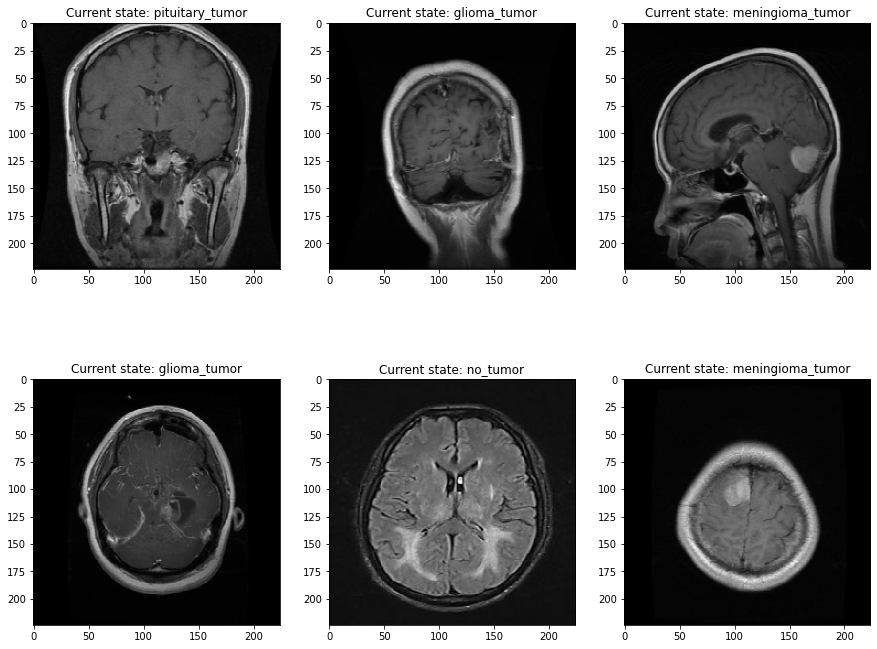

In [ ]:
batchX, batchy = train_ds.next()
batchX_test, batchy_test = test_ds.next()

plt.figure(1, figsize= (15, 12))
for i in range(6):
  j = np.random.randint(0, len(batchX))
  plt.subplot(2 , 3, i+1)
  plt.imshow(batchX[j])
  plt.title(f'Current state: {labels[np.argmax(batchy[j])]}')
plt.show()

- As we can see, all of the images have the same size (224x224) and labels respectively



---





## Building CNN model

In [ ]:
from keras.models import Model
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D,Input,AveragePooling2D

model = Sequential()
# Extract features
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 54, 54, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 256)      0

- There are total 14,404,676 params and all of them are Trainable params


---



### Display CNN Model Structure

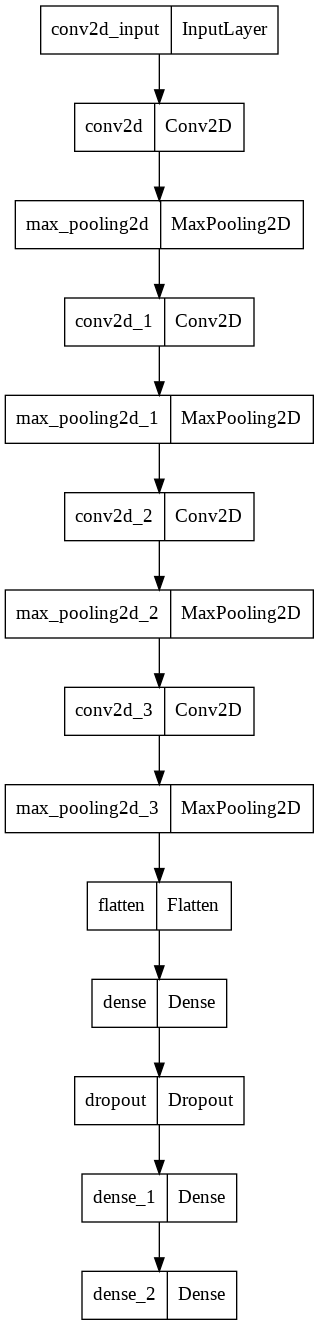

In [ ]:
tf.keras.utils.plot_model(
    model, show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None, show_layer_activations=False
)

In [ ]:
from keras.callbacks import EarlyStopping

callbacks=[EarlyStopping(monitor='val_loss',patience=4)]

In [ ]:
model.compile(loss ="categorical_crossentropy", optimizer ="adam", metrics = ["accuracy"])



---


### Training Model

In [ ]:
Q = model.fit(train_ds, 
              validation_data = val_ds, epochs=30,
              callbacks = callbacks)

Epoch 1/100
18/18 [==============================] - 39s 1s/step - loss: 1.2456 - accuracy: 0.4293 - val_loss: 1.2674 - val_accuracy: 0.3892
Epoch 2/100
18/18 [==============================] - 14s 781ms/step - loss: 0.8963 - accuracy: 0.6152 - val_loss: 1.2253 - val_accuracy: 0.4695
Epoch 3/100
18/18 [==============================] - 14s 757ms/step - loss: 0.7006 - accuracy: 0.6987 - val_loss: 1.0302 - val_accuracy: 0.4764
Epoch 4/100
18/18 [==============================] - 14s 773ms/step - loss: 0.5987 - accuracy: 0.7488 - val_loss: 1.1345 - val_accuracy: 0.5009
Epoch 5/100
18/18 [==============================] - 14s 777ms/step - loss: 0.5132 - accuracy: 0.7867 - val_loss: 0.9361 - val_accuracy: 0.6422
Epoch 6/100
18/18 [==============================] - 14s 769ms/step - loss: 0.4272 - accuracy: 0.8302 - val_loss: 1.0114 - val_accuracy: 0.6579
Epoch 7/100
18/18 [==============================] - 14s 774ms/step - loss: 0.3943 - accuracy: 0.8385 - val_loss: 1.0602 - val_accuracy: 0.

### Plotting Loss and Accuracy

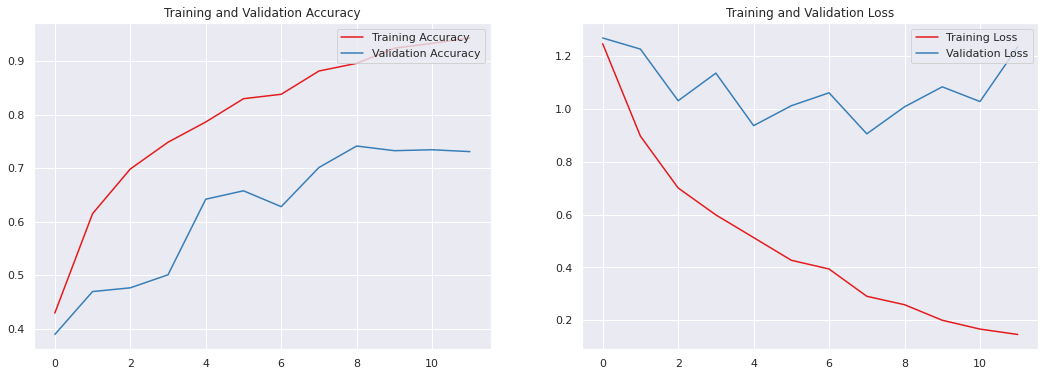

In [ ]:
sns.set(style='darkgrid', palette='Set1')

acc = Q.history['accuracy']
val_acc = Q.history['val_accuracy']

loss = Q.history['loss']
val_loss = Q.history['val_loss']

epochs_range = range(len(Q.history['accuracy']))

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(Q.history['accuracy'])), acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

- The Training accuracy raised rapidly from 0.42 to 0.94 while the Validation accuracy quite unstable and reach the maximum value at 0.74.
- The training Loss went straight down from 1.2 to almost 0.14. Validation Loss have the lowest point at 0.9.


---



### Display random images from Test set and their labels versus predicted labels

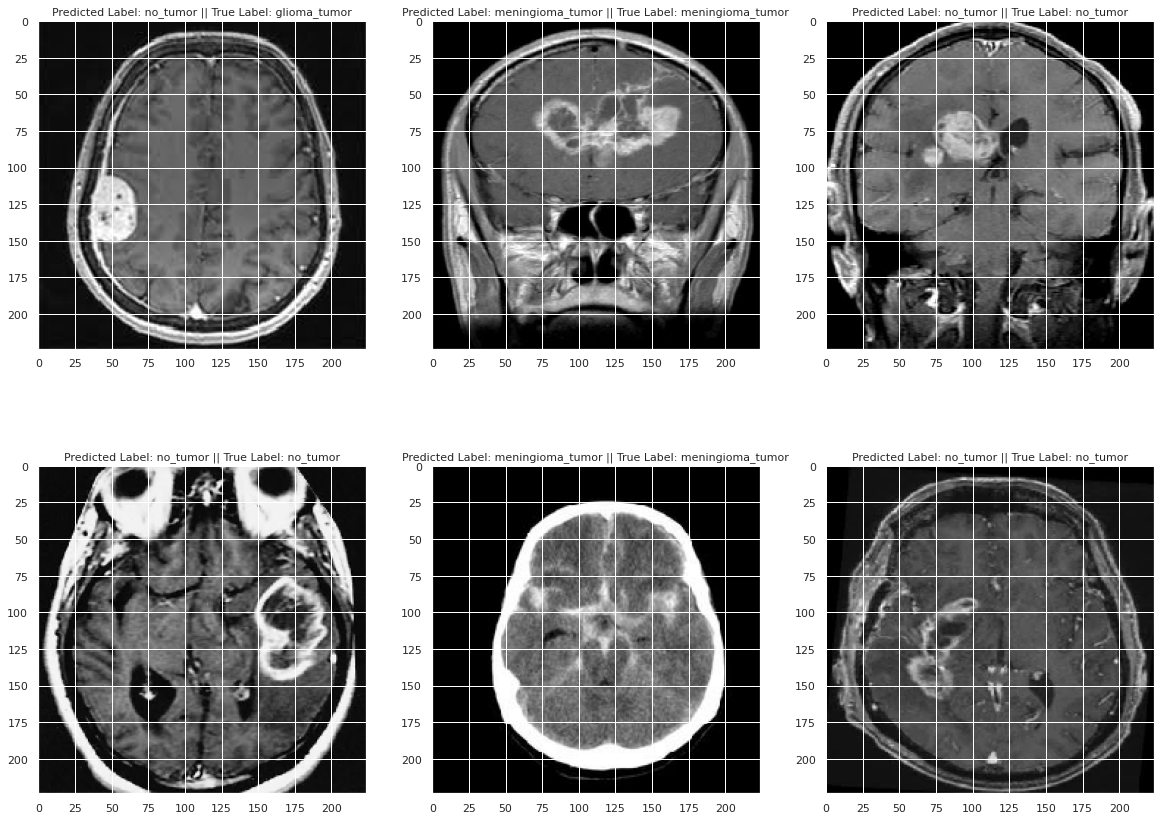

In [ ]:
plt.figure(figsize=(20,15))
pred = model.predict(batchX_test)
pred = np.argmax(pred,axis=1)
true_label = np.argmax(batchy_test, axis = 1)

for i in range(6):
  j = np.random.randint(0, len(batchX_test))
  plt.subplot(2,3,i+1)
  plt.imshow(batchX_test[j])
  plt.title(f'Predicted Label: {labels[pred[i]]} || True Label: {labels[np.argmax(batchy_test[i])]}',fontdict={'fontsize':11})

- 5 of the predicted labels are True and 1 of which are False when comparing to true labels.


---



### Plotting HeatMap of confusion matrix

+ precision = 0.675
+ recall = 0.577
+ f1_score = 0.510


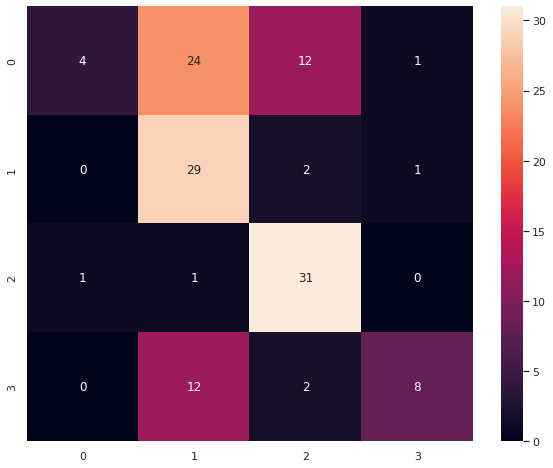

In [ ]:
a = precision_recall_fscore_support(true_label, pred, average='macro')
cf = confusion_matrix(true_label, pred)

print(f'+ precision = {a[0]:.3f}')
print(f'+ recall = {a[1]:.3f}')
print(f'+ f1_score = {a[2]:.3f}')
plt.figure(figsize = (10,8))
ax = sns.heatmap(data=cf ,fmt="d",annot = True)
plt.show()

- There are 1 error in predicting glioma_tumor, 37 errors in predicting meningioma_tumor, 16 errors in predicting no_tumor and 2 errors in pituitary_tumor. ❌❌❌


---




# Conclusion 🏳
  - There are too many errors in predicting tumor, that is why we have too improve this model in the future when it came to medical field.